Noise Level: 1
Number of training samples: 240
Number of validation samples: 60
n_samples: 300
Hidden Units: 8
Epoch 1/100, Train Loss: 0.7441, Validation Loss: 0.7810
Epoch 2/100, Train Loss: 0.6573, Validation Loss: 0.6723
Epoch 3/100, Train Loss: 0.6111, Validation Loss: 0.6116
Epoch 4/100, Train Loss: 0.5873, Validation Loss: 0.5789
Epoch 5/100, Train Loss: 0.5733, Validation Loss: 0.5618
Epoch 6/100, Train Loss: 0.5646, Validation Loss: 0.5532
Epoch 7/100, Train Loss: 0.5552, Validation Loss: 0.5488
Epoch 8/100, Train Loss: 0.5519, Validation Loss: 0.5487
Epoch 9/100, Train Loss: 0.5514, Validation Loss: 0.5515
Epoch 10/100, Train Loss: 0.5507, Validation Loss: 0.5487
Epoch 11/100, Train Loss: 0.5498, Validation Loss: 0.5474
Epoch 12/100, Train Loss: 0.5494, Validation Loss: 0.5435
Epoch 13/100, Train Loss: 0.5484, Validation Loss: 0.5412
Epoch 14/100, Train Loss: 0.5483, Validation Loss: 0.5390
Epoch 15/100, Train Loss: 0.5479, Validation Loss: 0.5382
Epoch 16/100, Train Loss: 0.

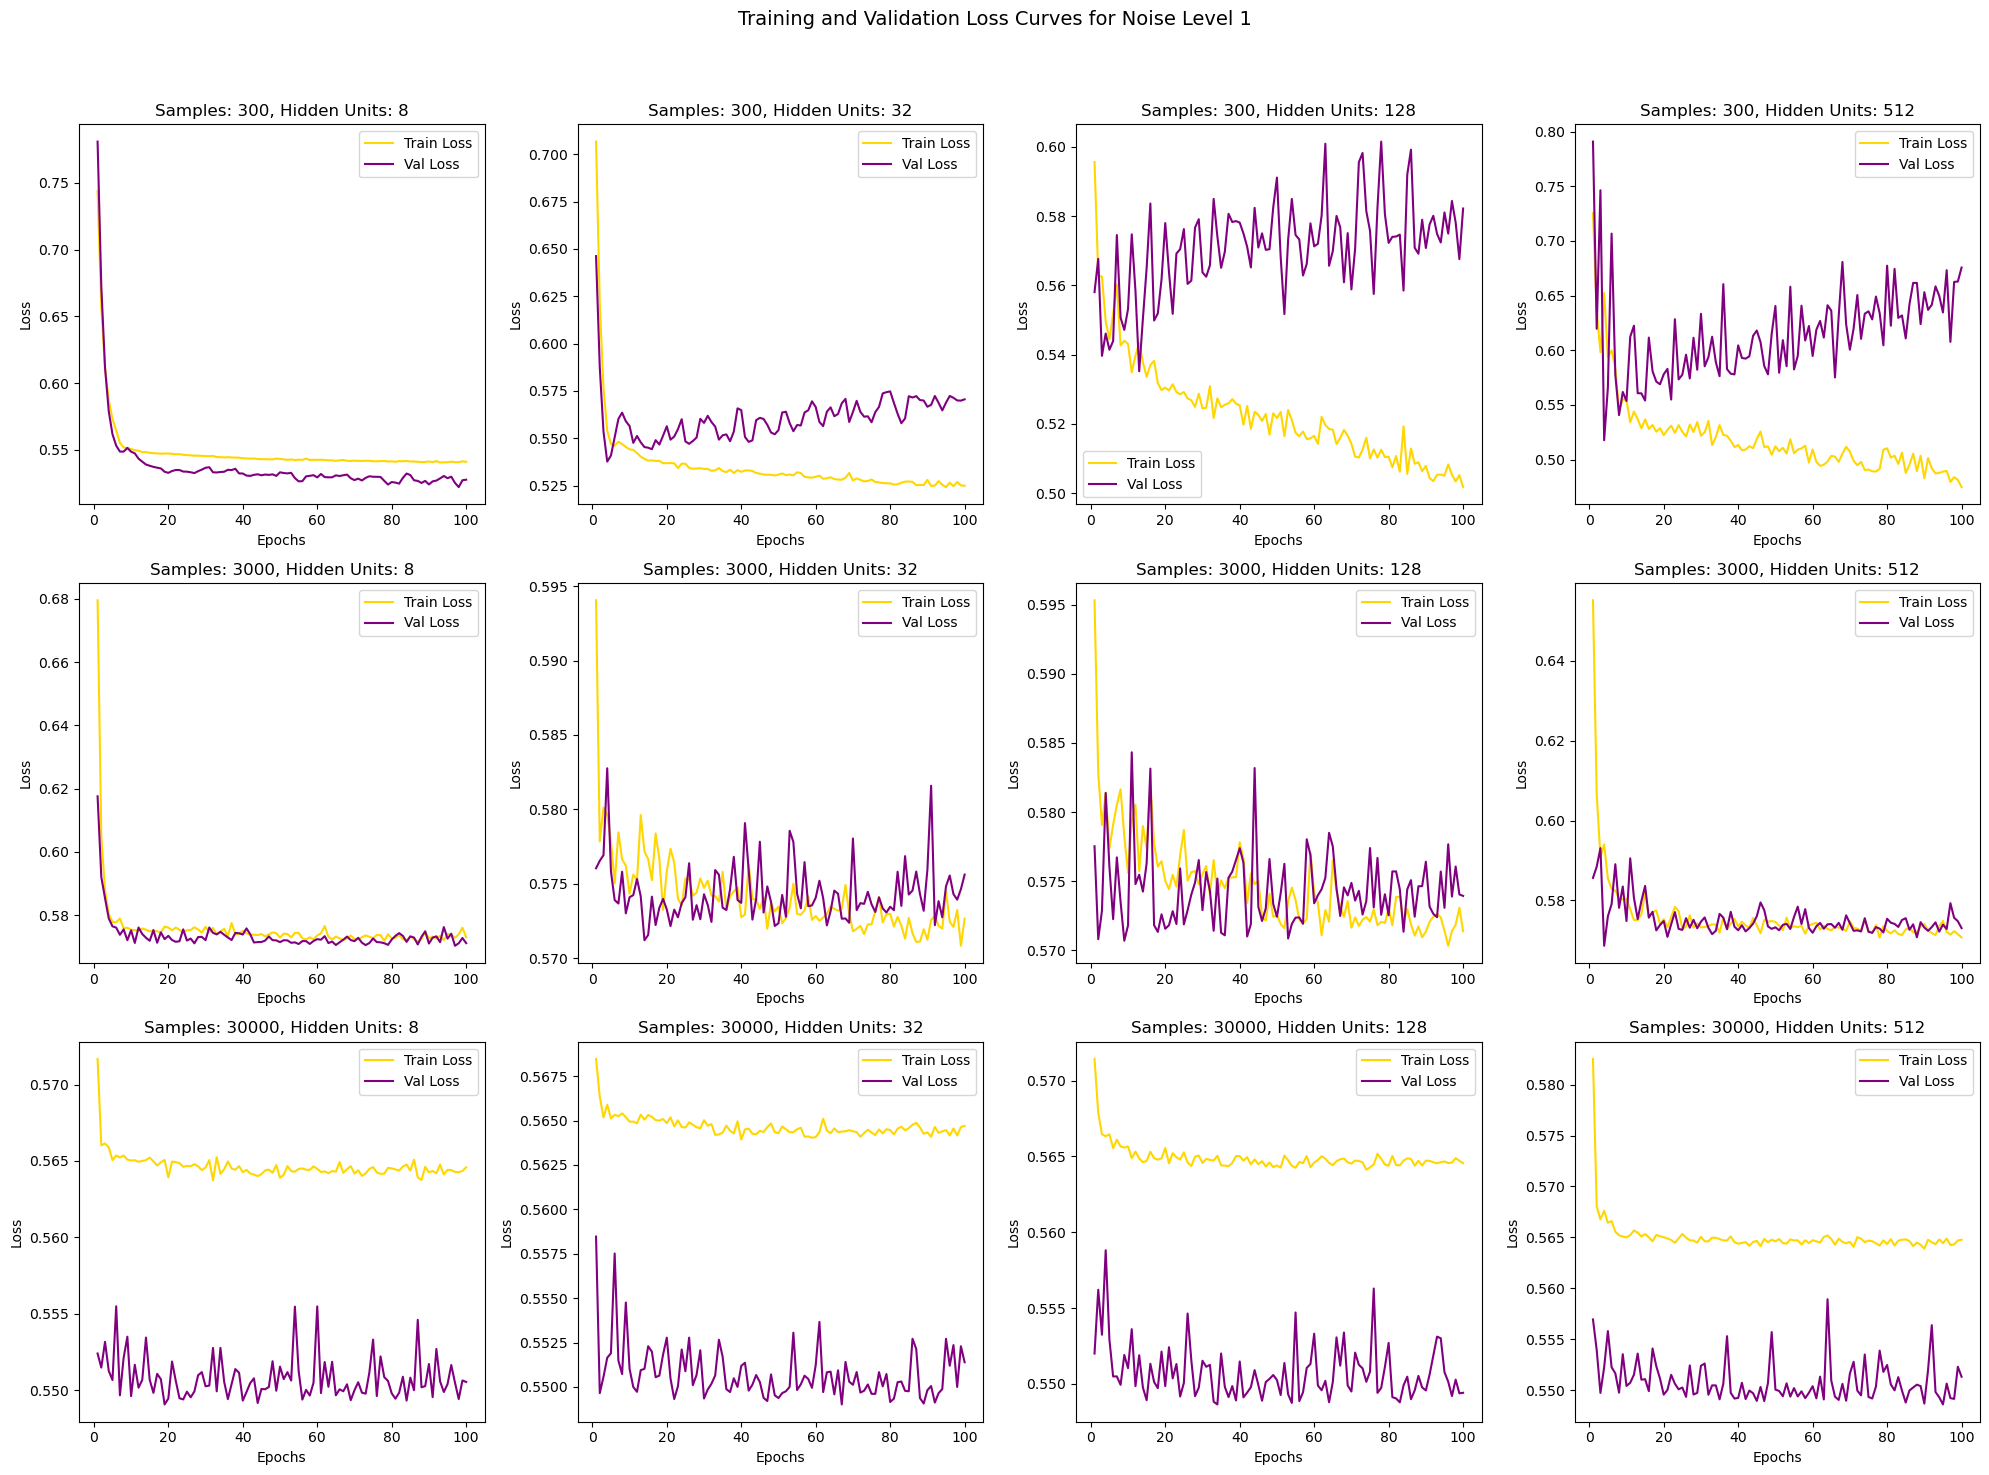



Noise Level: 4
Number of training samples: 240
Number of validation samples: 60
n_samples: 300
Hidden Units: 8
Epoch 1/100, Train Loss: 0.6864, Validation Loss: 0.6911
Epoch 2/100, Train Loss: 0.6708, Validation Loss: 0.6772
Epoch 3/100, Train Loss: 0.6717, Validation Loss: 0.6731
Epoch 4/100, Train Loss: 0.6741, Validation Loss: 0.6776
Epoch 5/100, Train Loss: 0.6709, Validation Loss: 0.6802
Epoch 6/100, Train Loss: 0.6685, Validation Loss: 0.6886
Epoch 7/100, Train Loss: 0.6680, Validation Loss: 0.6949
Epoch 8/100, Train Loss: 0.6680, Validation Loss: 0.6943
Epoch 9/100, Train Loss: 0.6675, Validation Loss: 0.6913
Epoch 10/100, Train Loss: 0.6667, Validation Loss: 0.6876
Epoch 11/100, Train Loss: 0.6669, Validation Loss: 0.6842
Epoch 12/100, Train Loss: 0.6657, Validation Loss: 0.6858
Epoch 13/100, Train Loss: 0.6651, Validation Loss: 0.6880
Epoch 14/100, Train Loss: 0.6659, Validation Loss: 0.6907
Epoch 15/100, Train Loss: 0.6642, Validation Loss: 0.6878
Epoch 16/100, Train Loss: 

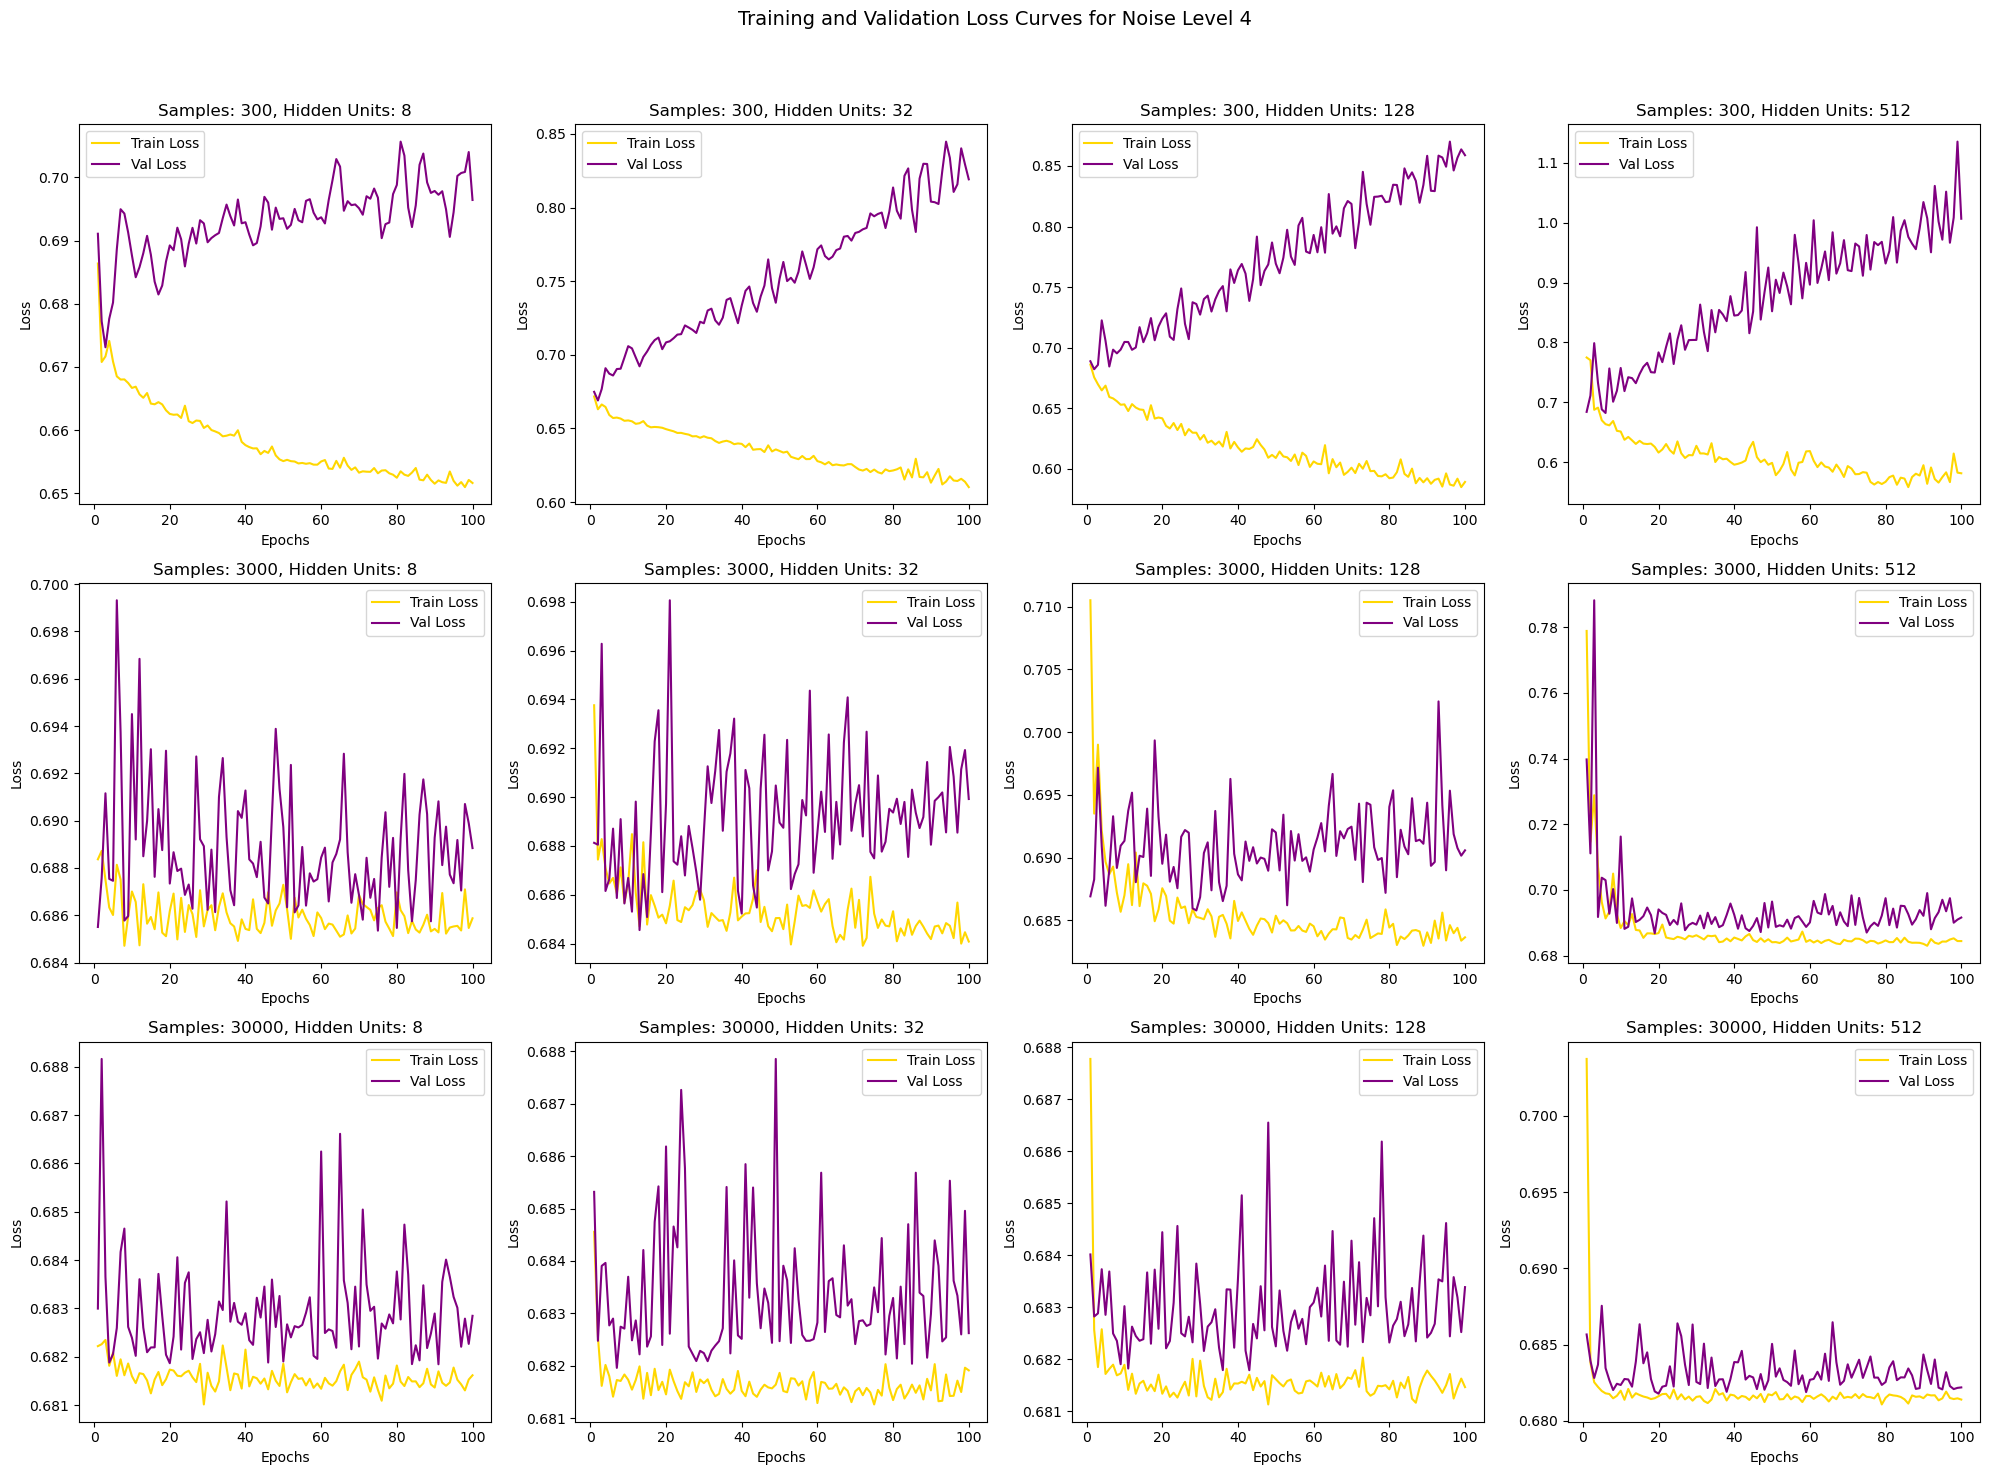



Noise Level: 8
Number of training samples: 240
Number of validation samples: 60
n_samples: 300
Hidden Units: 8
Epoch 1/100, Train Loss: 0.7616, Validation Loss: 0.7575
Epoch 2/100, Train Loss: 0.7244, Validation Loss: 0.7204
Epoch 3/100, Train Loss: 0.7058, Validation Loss: 0.7014
Epoch 4/100, Train Loss: 0.6938, Validation Loss: 0.6886
Epoch 5/100, Train Loss: 0.6908, Validation Loss: 0.6785
Epoch 6/100, Train Loss: 0.6884, Validation Loss: 0.6738
Epoch 7/100, Train Loss: 0.6875, Validation Loss: 0.6720
Epoch 8/100, Train Loss: 0.6857, Validation Loss: 0.6725
Epoch 9/100, Train Loss: 0.6845, Validation Loss: 0.6738
Epoch 10/100, Train Loss: 0.6831, Validation Loss: 0.6751
Epoch 11/100, Train Loss: 0.6821, Validation Loss: 0.6773
Epoch 12/100, Train Loss: 0.6812, Validation Loss: 0.6783
Epoch 13/100, Train Loss: 0.6802, Validation Loss: 0.6799
Epoch 14/100, Train Loss: 0.6787, Validation Loss: 0.6822
Epoch 15/100, Train Loss: 0.6776, Validation Loss: 0.6844
Epoch 16/100, Train Loss: 

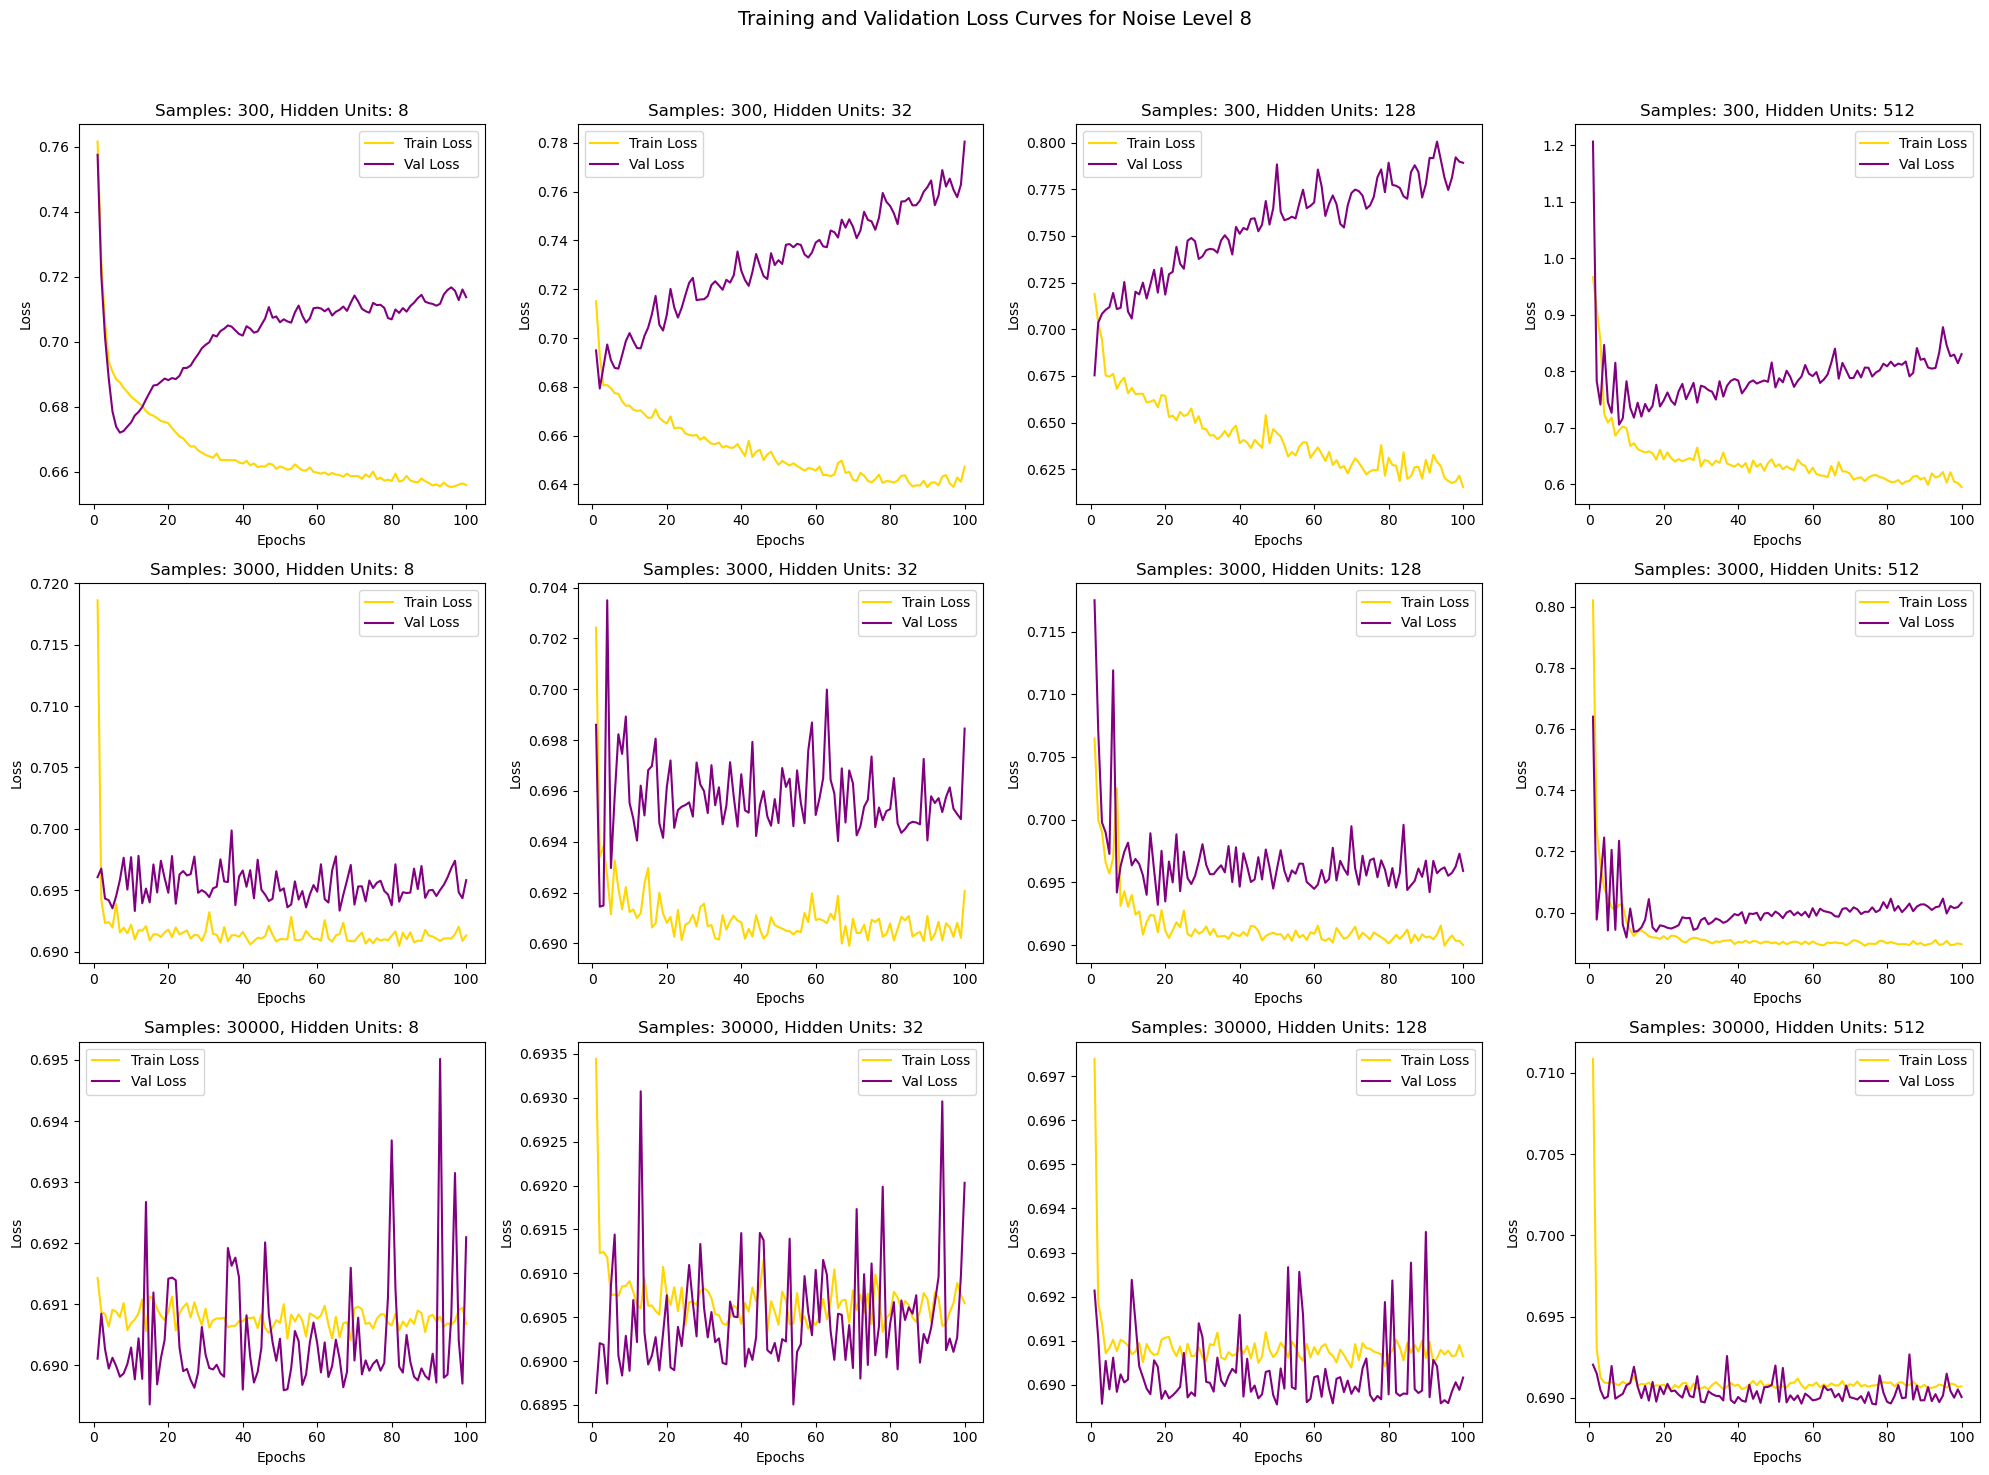



Noise Level: 1
n_samples: 300
Number of training samples: 240
Number of validation samples: 60
Weight decay: 0.0001
Hidden Units: 8
Epoch 1/100, Train Loss: 0.7672, Validation Loss: 0.7538
Epoch 2/100, Train Loss: 0.7145, Validation Loss: 0.7010
Epoch 3/100, Train Loss: 0.6799, Validation Loss: 0.6594
Epoch 4/100, Train Loss: 0.6529, Validation Loss: 0.6251
Epoch 5/100, Train Loss: 0.6319, Validation Loss: 0.5957
Epoch 6/100, Train Loss: 0.6165, Validation Loss: 0.5694
Epoch 7/100, Train Loss: 0.6013, Validation Loss: 0.5472
Epoch 8/100, Train Loss: 0.5911, Validation Loss: 0.5273
Epoch 9/100, Train Loss: 0.5805, Validation Loss: 0.5118
Epoch 10/100, Train Loss: 0.5735, Validation Loss: 0.4985
Epoch 11/100, Train Loss: 0.5675, Validation Loss: 0.4899
Epoch 12/100, Train Loss: 0.5648, Validation Loss: 0.4836
Epoch 13/100, Train Loss: 0.5637, Validation Loss: 0.4789
Epoch 14/100, Train Loss: 0.5631, Validation Loss: 0.4768
Epoch 15/100, Train Loss: 0.5620, Validation Loss: 0.4770
Epoch

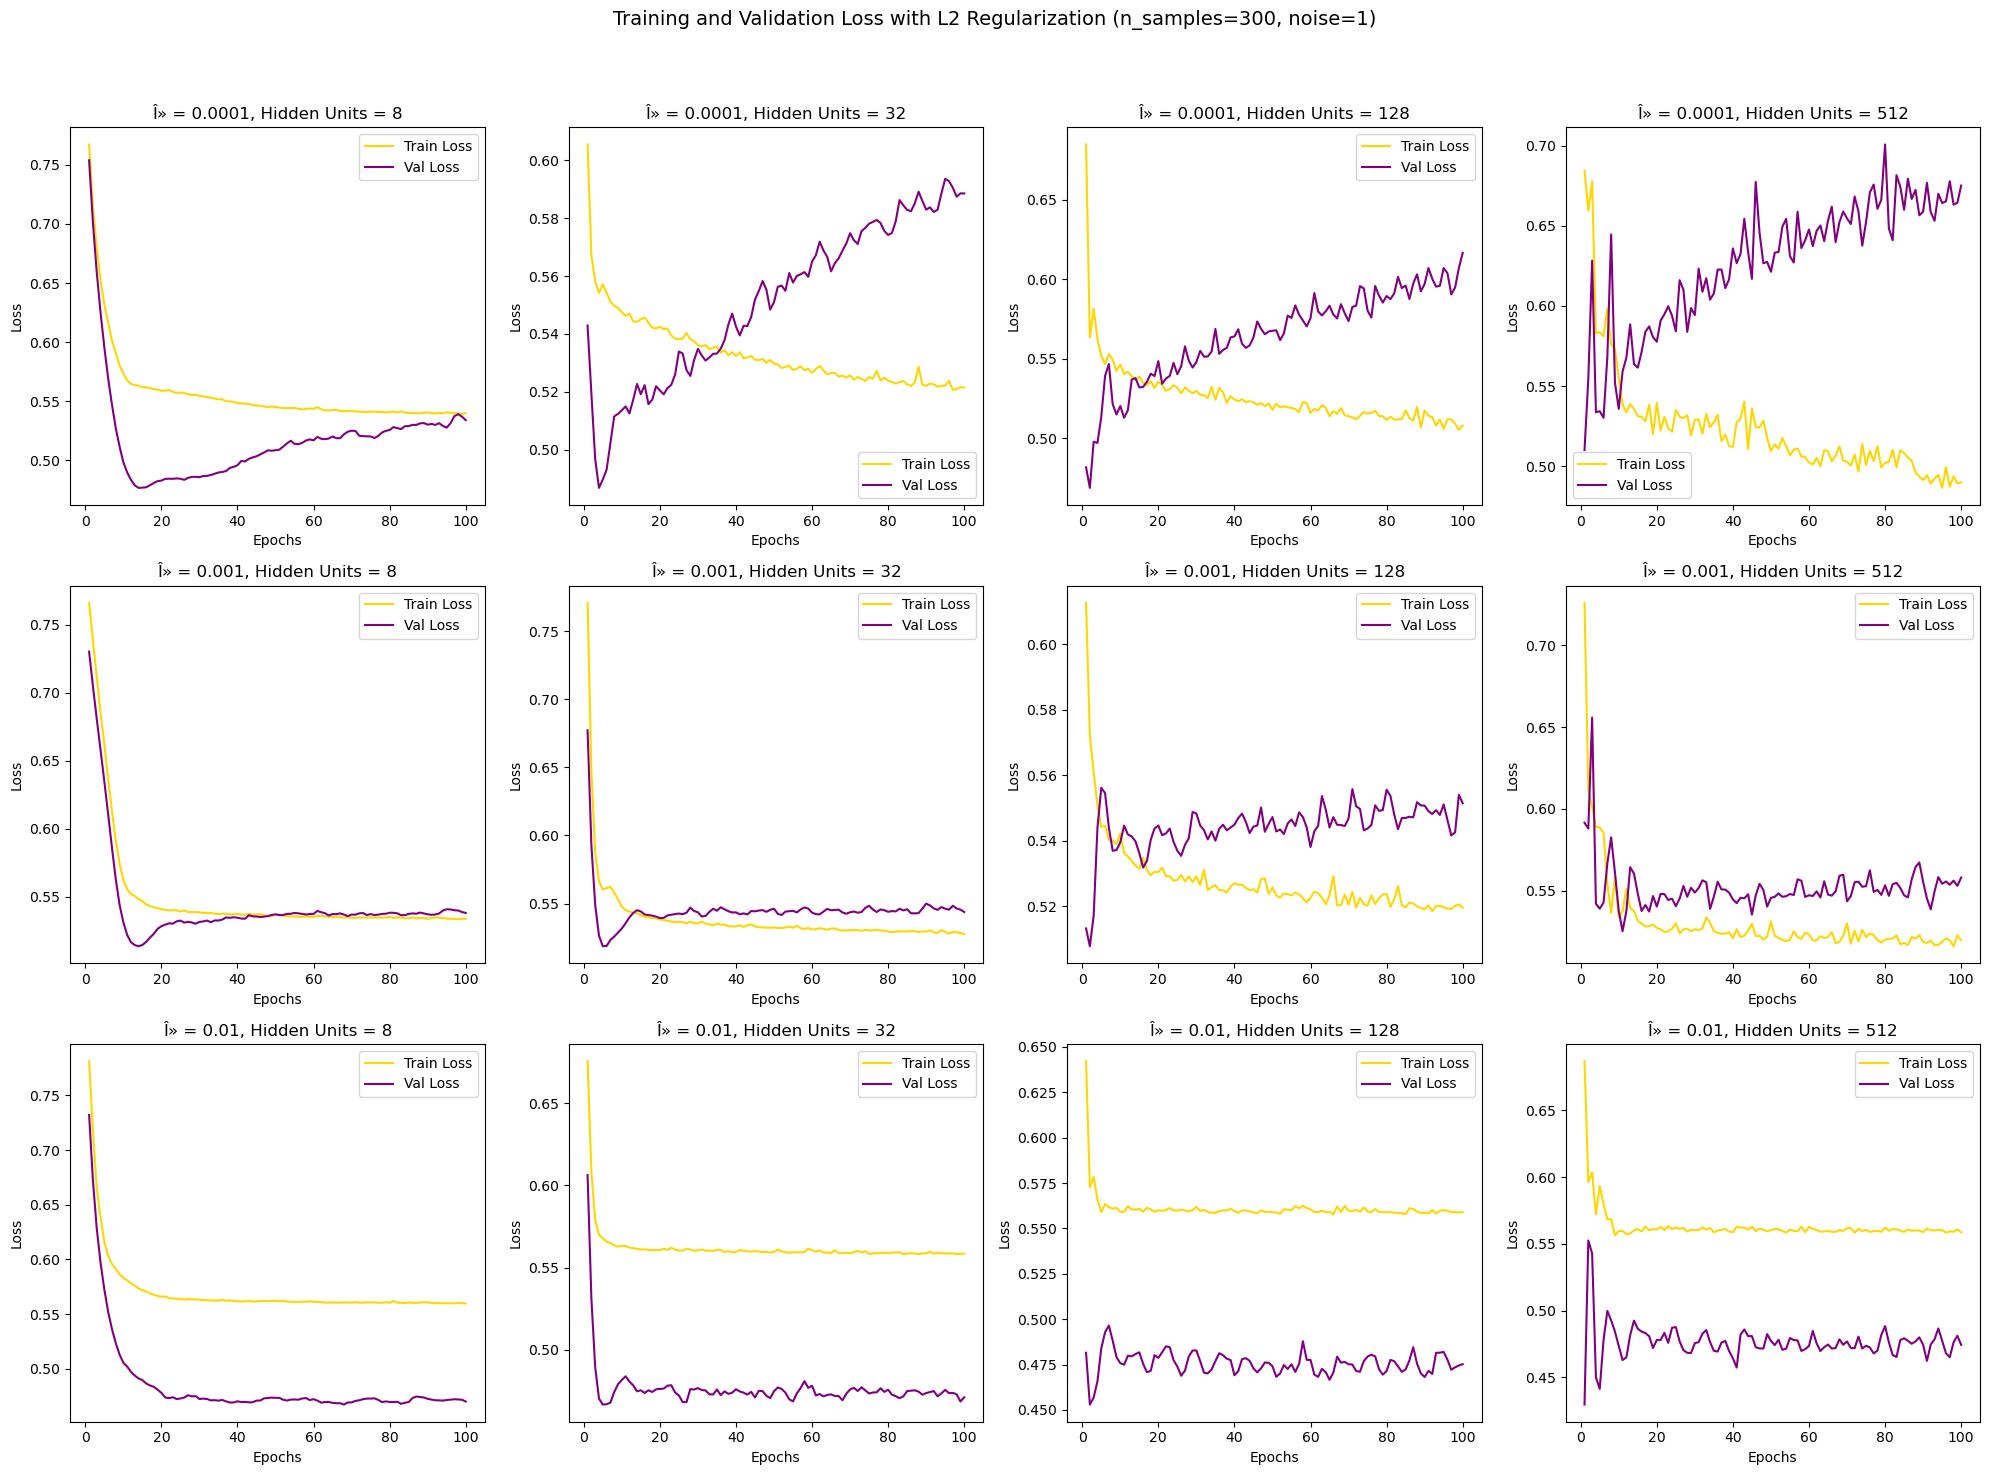

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# 1. Generates the dataset and split it into training and validation sets.
def generate_dataset(n_samples, noise_level):
    
    # Generate a BCS dataset with make_moons()
    X, y = make_moons(n_samples=n_samples, noise=noise_level, random_state=42)
    X = StandardScaler().fit_transform(X)  # Standardize the X axis features

    # Convert to tensors
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.long)

    # Combines Tensor datasets to be split
    dataset = TensorDataset(X_tensor, y_tensor)
    
    # Split training set (80%, 20%) between training set and validation set.
    train_size = int(0.8 * n_samples)
    val_size = n_samples - train_size

    train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
    
    # Verify the data loaders
    print(f"Number of training samples: {len(train_loader.dataset)}")
    print(f"Number of validation samples: {len(val_loader.dataset)}")
    
    return train_loader, val_loader



# 2. Designs an MLP with a single hidden layer and ReLU activation.
# 3. The number of hidden units is a variable.
# All neural network layers (MLP, CCN) are subclasses on nn.Module base class.
class MLP(nn.Module):
    def __init__(self, input_size, hidden_units, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_units)
        self.fc2 = nn.Linear(hidden_units, output_size)
    
    def forward(self, x):
        x = self.fc1(x)     # Input layer
        x = torch.relu(x)   # Apply ReLU activation after the first layer
        x = self.fc2(x)     # Output
        return x

# Training function
def train(model, loader, criterion, optimizer):
    model.train()
    total_loss = 0
    
    for data, target in loader:
        # Forward pass
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        
        # Backwards pass & optimization
        loss.backward()
        optimizer.step()
        
        # Loss accumulation
        total_loss += loss.item() * data.size(0)
        
    return total_loss / len(loader.dataset)

# Validation function
def validate(model, loader, criterion):
    model.eval()
    total_loss = 0
    
    with torch.no_grad():
        for data, target in loader:
            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item() * data.size(0)
            
    return total_loss / len(loader.dataset)



noise_levels = [1, 4, 8]
n_samples_list = [300, 3000, 30000]
# 3. The number of hidden units is a variable.
hidden_units_list = [8, 32, 128, 512]

# make_moons() generates 2 features (BCS dataset)
input_size = 2
output_size = 2

#-------------------------!!!!!!!!!!!!!!!!!!!!!!!-------------------------#
# Warning: this loop will generate 36 plots, 12 for each noise level
# It is intensive and will consume CPU resources and take some time
#-------------------------!!!!!!!!!!!!!!!!!!!!!!!-------------------------#
for noise in noise_levels:
    fig, axs = plt.subplots(3, 4, figsize=(20, 15))
    fig.suptitle(f"Training and Validation Loss Curves for Noise Level {noise}", fontsize=14)
    
    print(f'Noise Level: {noise}')
    
    for i, n_samples in enumerate(n_samples_list):
        train_loader, val_loader = generate_dataset(n_samples, noise)
        
        print(f'n_samples: {n_samples}')
        
        for j, hidden_units in enumerate(hidden_units_list):
            # Create MLP model with hidden_units as a variable
            model = MLP(input_size, hidden_units, output_size)
            
            # 4. Uses the cross entropy loss function.
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(), lr=0.01)
            
            # Sets to store loss data
            train_losses, val_losses = [], []
            
            print(f'Hidden Units: {hidden_units}')
            
            # 5. Trains the model for 100 epochs and plot the training and validation losses on the same graph vs. the epoch number.
            epochs = 100
            for epoch in range(epochs):
                
                train_loss = train(model, train_loader, criterion, optimizer)
                val_loss = validate(model, val_loader, criterion)
            
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')
            
            print('\n')
            
            # Plot in the subplot (row=i, column=j)
            ax = axs[i, j]
            ax.plot(range(1, epochs+1), train_losses, label='Train Loss', color='gold')
            ax.plot(range(1, epochs+1), val_losses, label='Val Loss', color='purple')
            ax.set_title(f'Samples: {n_samples}, Hidden Units: {hidden_units}')
            ax.set_xlabel('Epochs')
            ax.set_ylabel('Loss')
            ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to accommodate the suptitle
    plt.show()
    
    print('\n')



# Task Two: Add L2 Regularization to your code and test with different weight decay parameters.
n_samples = 300
noise_level = 1
lambdas = [1e-4, 1e-3, 1e-2]

print(f'Noise Level: {noise_level}')
print(f'n_samples: {n_samples}')

fig, axs = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle(f"Training and Validation Loss with L2 Regularization (n_samples={n_samples}, noise={noise_level})", fontsize=14)

for i, lambda_val in enumerate(lambdas):
    train_loader, val_loader = generate_dataset(n_samples, noise_level)
    
    print(f'Weight decay: {lambda_val}')
    
    for j, hidden_units in enumerate(hidden_units_list):
        # Create MLP model with hidden_units as a variable
        model = MLP(input_size, hidden_units, output_size)
            
        # 4. Uses the cross entropy loss function.
        criterion = nn.CrossEntropyLoss()
        # Here is where we add the L2 Regularization weight decay parameter
        optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=lambda_val)
            
        # Sets to store loss data
        train_losses, val_losses = [], []
            
        print(f'Hidden Units: {hidden_units}')
            
        # Training and validation loops for 100 epochs
        epochs = 100
        for epoch in range(epochs):
                
            train_loss = train(model, train_loader, criterion, optimizer)
            val_loss = validate(model, val_loader, criterion)
            
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')
            
        print('\n')
            
        # Plot in the subplot (row=i, column=j)
        ax = axs[i, j]
        ax.plot(range(1, epochs+1), train_losses, label='Train Loss', color='gold')
        ax.plot(range(1, epochs+1), val_losses, label='Val Loss', color='purple')
        ax.set_title(f'Î» = {lambda_val}, Hidden Units = {hidden_units}')
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Loss')
        ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to accommodate the suptitle
plt.show()